# Import libreries

In [1]:
#importar librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Understanding the dataset

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train_data.shape, test_data.shape

((891, 12), (418, 11))

In [5]:
train_data.info()
# print('-'*80)
# test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.isna().sum()
# print('-'*80)
# test_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
for col in train_data.columns:
    print(f"{col}: {train_data[col].nunique()} valores únicos")

PassengerId: 891 valores únicos
Survived: 2 valores únicos
Pclass: 3 valores únicos
Name: 891 valores únicos
Sex: 2 valores únicos
Age: 88 valores únicos
SibSp: 7 valores únicos
Parch: 7 valores únicos
Ticket: 681 valores únicos
Fare: 248 valores únicos
Cabin: 147 valores únicos
Embarked: 3 valores únicos


In [9]:
train_data.duplicated().sum()

0

In [10]:
(train_data.isna().sum() / len(train_data)) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [11]:
train_data['Survived'].value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

El 61.62% no sobrevivieron y el 38.38% si sobrevivieron

In [12]:
numeric_columns = train_data.select_dtypes(include=['number'])
corr = numeric_columns.corr()

print(corr['Survived'].abs().sort_values(ascending=False))

Survived       1.000000
Pclass         0.338481
Fare           0.257307
Parch          0.081629
Age            0.077221
SibSp          0.035322
PassengerId    0.005007
Name: Survived, dtype: float64


Lo puse absoluto para ver la relacion sin importar la dirección (positiva o negativa). Con más relacion es con `Pclass`(las clase más bjas tienen menos porbabilidades de sobrevivir). Con `Fare` (los pasajeros que pagaron bás tenían más probabilidades de sobrevivir). Y tiene una relación muy débil con `Parch`  y con `Age`.

# Data Cleaning

In [13]:
print(train_data.duplicated().count())

891


In [14]:
train_data = train_data.drop_duplicates()
train_data.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Sabemos ahora que en Cabin hay 204 valores/entradas. Se puede quitar
- Ahora Ticket que no me aporta ninguna informaciń relevante
.
- En Age que se puede rellenar con la media
- Y que Embarked se puede rellenar con la moda
- Y el Sex pasarlo a int con 0 y 1

In [16]:
train_data = train_data.drop(columns="Cabin")
train_data = train_data.drop('Ticket', axis = 1)

train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])
train_data['Sex'] = train_data['Sex'].apply(lambda x: 1 if x == 'female' else 0).astype(int)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


In [17]:
test_data = test_data.drop(columns="Cabin")
test_data = test_data.drop('Ticket', axis = 1)

test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])
test_data['Sex'] = test_data['Sex'].apply(lambda x: 1 if x == 'female' else 0).astype(int)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         417 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


- Pasar Embarked a int, además de poner S, C, Q a 1, 2, 3

In [18]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_data['Embarked_encoded'] = train_data['Embarked'].map(embarked_mapping)
test_data['Embarked_encoded'] = test_data['Embarked'].map(embarked_mapping)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_encoded
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,1


In [19]:
numeric_columns = train_data.select_dtypes(include=['number'])
numeric_column_names = numeric_columns.columns.tolist()
print("Numeric Column Names:", numeric_column_names)

Numeric Column Names: ['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_encoded']


In [20]:
combine = [train_data, test_data]
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\\.', expand=False)

train_data['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [21]:
for dataset in combine:

    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Dr', 'Major', 'Rev'], 'Classy')
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Sir','Jonkheer', 'Countess','Dona'],'Noble')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Don', 'Mrs')
    
train_data['Title'].value_counts()

Title
Mr        517
Miss      185
Mrs       127
Master     40
Classy     18
Noble       4
Name: count, dtype: int64

In [22]:
for dataset in combine:
    dataset.loc[(dataset["Title"] == 'Mr'), 'Title'] = 0
    dataset.loc[(dataset["Title"] == 'Mrs'), 'Title'] = 1
    dataset.loc[(dataset["Title"] == 'Miss'), 'Title'] = 2
    dataset.loc[(dataset["Title"] == 'Master'), 'Title'] = 3
    dataset.loc[(dataset["Title"] == 'Classy'), 'Title'] = 4
    dataset.loc[(dataset["Title"] == 'Noble'), 'Title'] = 5

train_data = train_data.drop('Name', axis = 1)
test_data = test_data.drop('Name', axis = 1)

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_encoded,Title
0,1,0,3,0,22.0,1,0,7.2500,S,1,0
1,2,1,1,1,38.0,1,0,71.2833,C,2,1
2,3,1,3,1,26.0,0,0,7.9250,S,1,2
3,4,1,1,1,35.0,1,0,53.1000,S,1,1
4,5,0,3,0,35.0,0,0,8.0500,S,1,0


In [23]:
# 1. Combinación de Pclass y Embarked
train_data['Pclass_Embarked'] = train_data['Pclass'].astype(str) + '_' + train_data['Embarked_encoded'].astype(str)
test_data['Pclass_Embarked'] = test_data['Pclass'].astype(str) + '_' + test_data['Embarked_encoded'].astype(str)

# 2. Tamaño de la familia (SibSp + Parch)
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [24]:
q1_age = train_data['Age'].quantile(0.01)
q3_age = train_data['Age'].quantile(0.99)
iqr_age = q3_age - q1_age
lower_bound_age = q1_age - 1.5 * iqr_age
upper_bound_age = q3_age + 1.5 * iqr_age
train_data = train_data[(train_data['Age'] >= lower_bound_age) & (train_data['Age'] <= upper_bound_age)]
test_data = test_data[(test_data['Age'] >= lower_bound_age) & (test_data['Age'] <= upper_bound_age)]


In [25]:
q1_fare = train_data['Fare'].quantile(0.01)
q3_fare = train_data['Fare'].quantile(0.99)
iqr_fare = q3_fare - q1_fare
lower_bound_fare = q1_fare - 1.5 * iqr_fare
upper_bound_fare = q3_fare + 1.5 * iqr_fare
train_data = train_data[(train_data['Fare'] >= lower_bound_fare) & (train_data['Fare'] <= upper_bound_fare)]
test_data = test_data[(test_data['Fare'] >= lower_bound_fare) & (test_data['Fare'] <= upper_bound_fare)]


In [26]:
train_data.info()
print('-'*80)
test_data.info()
print('-'*80)
train_data.head()
# test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Sex               891 non-null    int64  
 4   Age               891 non-null    float64
 5   SibSp             891 non-null    int64  
 6   Parch             891 non-null    int64  
 7   Fare              891 non-null    float64
 8   Embarked          891 non-null    object 
 9   Embarked_encoded  891 non-null    int64  
 10  Title             891 non-null    object 
 11  Pclass_Embarked   891 non-null    object 
 12  FamilySize        891 non-null    int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 90.6+ KB
--------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 4

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_encoded,Title,Pclass_Embarked,FamilySize
0,1,0,3,0,22.0,1,0,7.2500,S,1,0,3_1,2
1,2,1,1,1,38.0,1,0,71.2833,C,2,1,1_2,2
2,3,1,3,1,26.0,0,0,7.9250,S,1,2,3_1,1
3,4,1,1,1,35.0,1,0,53.1000,S,1,1,1_1,2
4,5,0,3,0,35.0,0,0,8.0500,S,1,0,3_1,1


# Visualization

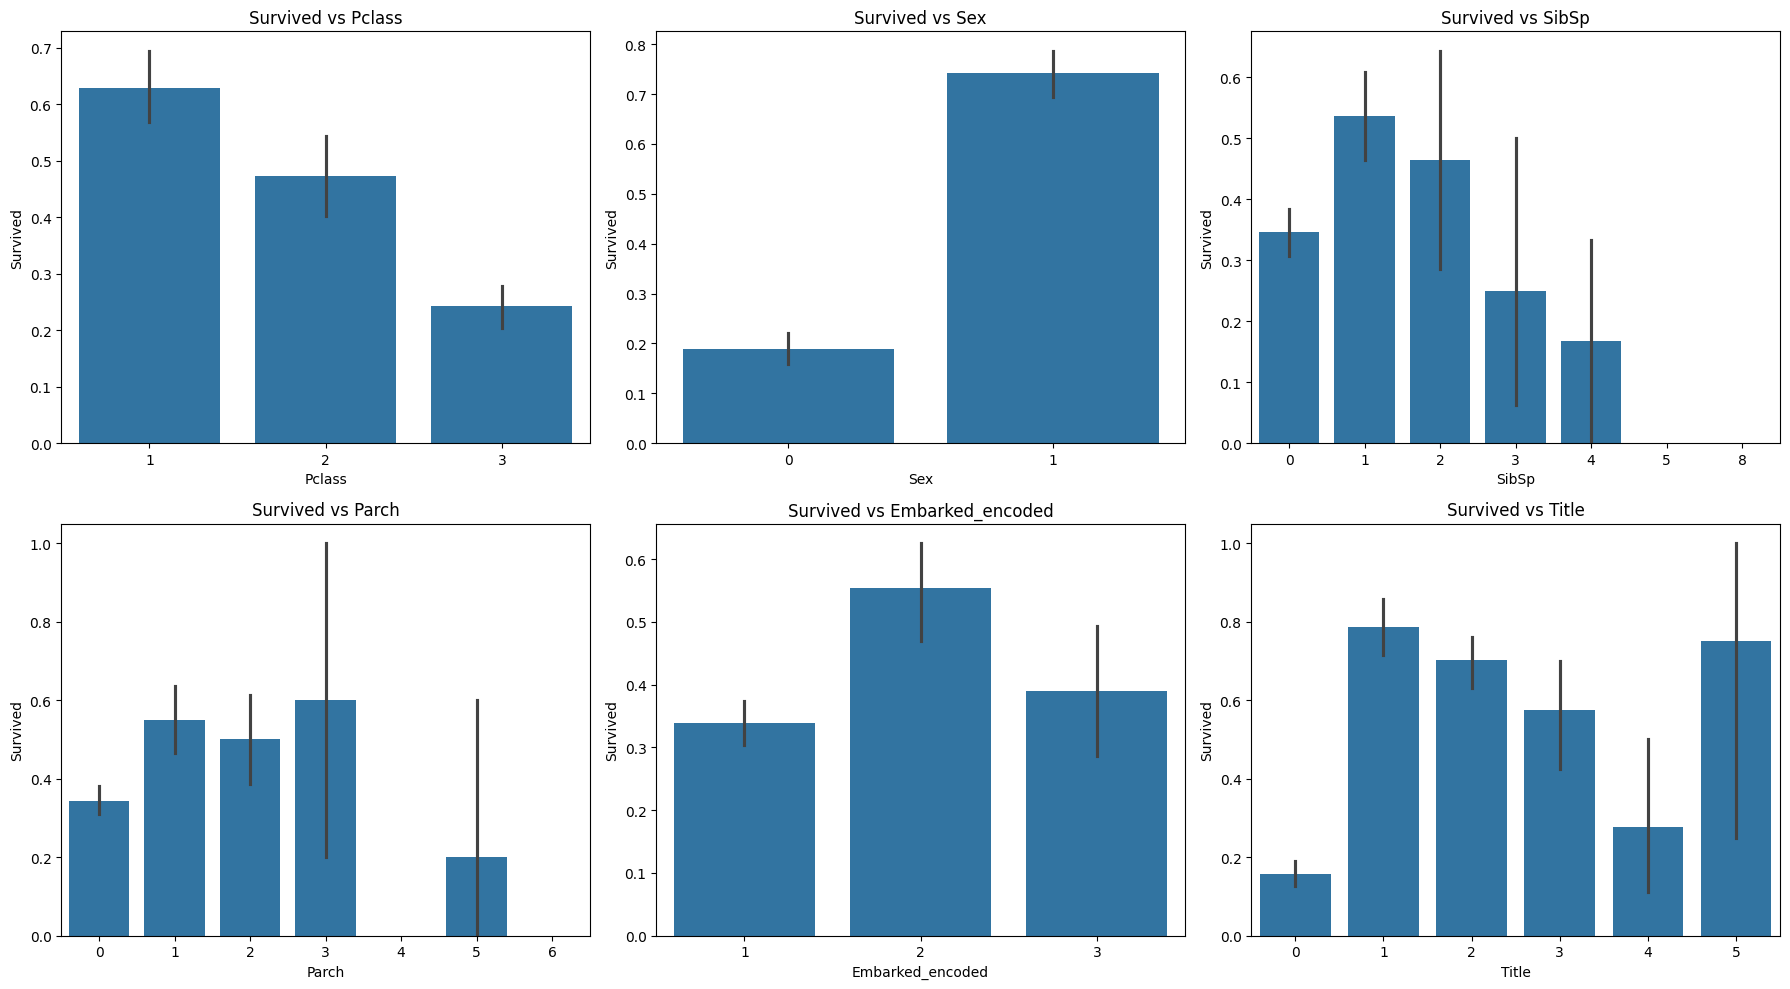

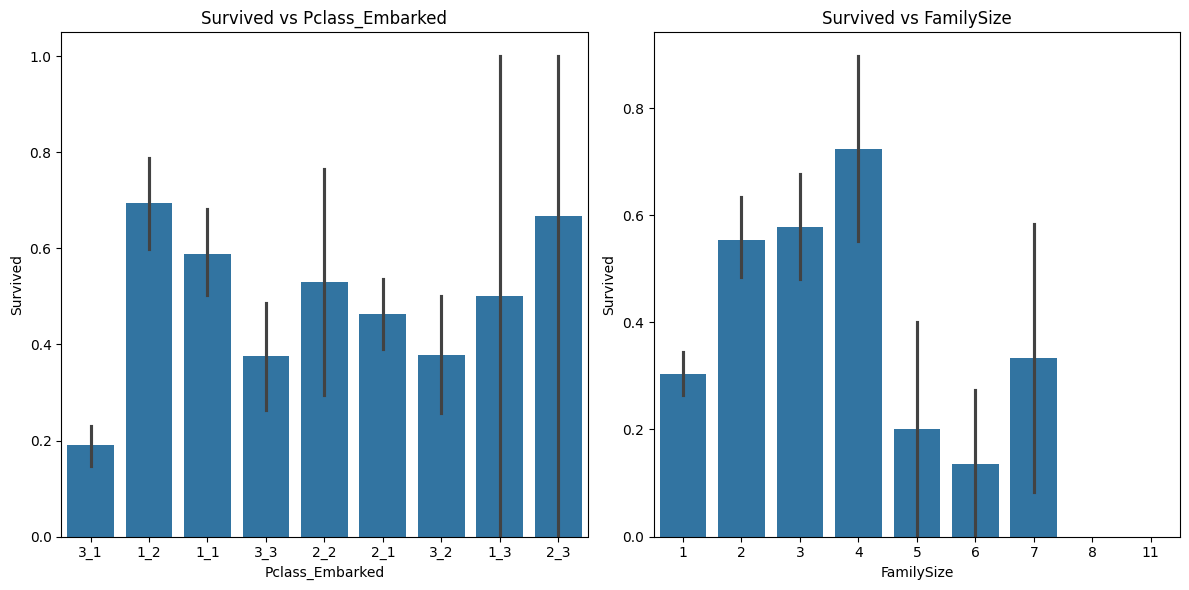

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el tamaño de la figura general
plt.figure(figsize=(18, 10))

# Subgráfica 1: Survived vs Pclass
plt.subplot(2, 3, 1)
sns.barplot(x="Pclass", y="Survived", data=train_data)
plt.title("Survived vs Pclass")

# Subgráfica 2: Survived vs Sex
plt.subplot(2, 3, 2)
sns.barplot(x="Sex", y="Survived", data=train_data)
plt.title("Survived vs Sex")

# Subgráfica 3: Survived vs SibSp
plt.subplot(2, 3, 3)
sns.barplot(x="SibSp", y="Survived", data=train_data)
plt.title("Survived vs SibSp")

# Subgráfica 4: Survived vs Parch
plt.subplot(2, 3, 4)
sns.barplot(x="Parch", y="Survived", data=train_data)
plt.title("Survived vs Parch")

# Subgráfica 5: Survived vs Embarked_encoded (en lugar de Embarked)
plt.subplot(2, 3, 5)
sns.barplot(x="Embarked_encoded", y="Survived", data=train_data)
plt.title("Survived vs Embarked_encoded")

# Subgráfica 6: Survived vs Title
plt.subplot(2, 3, 6)
sns.barplot(x="Title", y="Survived", data=train_data)
plt.title("Survived vs Title")

# Mostrar todas las gráficas
plt.tight_layout()
plt.show()

# Ahora, las dos últimas visualizaciones una al lado de la otra:
plt.figure(figsize=(12, 6))

# Subgráfico 7: Survived vs Pclass_Embarked
plt.subplot(1, 2, 1)
sns.barplot(x="Pclass_Embarked", y="Survived", data=train_data)
plt.title("Survived vs Pclass_Embarked")

# Subgráfico 8: Survived vs FamilySize
plt.subplot(1, 2, 2)
sns.barplot(x="FamilySize", y="Survived", data=train_data)
plt.title("Survived vs FamilySize")

# Mostrar ambas gráficas
plt.tight_layout()
plt.show()


Sobrevivieron más personas de la primera clase que los de clase 2 o 3

Sobrevivieron más mujeres que hombres

Si tenias 0 o más de dos acompañantes como hermanos/as o conyuge se tenía más probabilidad de morir. Si tenías un solo acompañante tenías más probabilidad de sobrevivir.

Si tienes más de 3 hijos o padres tienes más probabilidad de morir, y si no tienes ninguno también. Entonces si tienes 1,2 o 3 hijos podrías sobrevivir.

Personas que sobrevivieron por cada embarcación

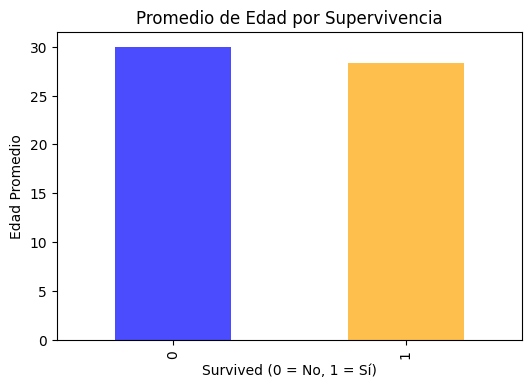

In [28]:
age_mean = train_data.groupby("Survived")["Age"].mean()

plt.figure(figsize=(6, 4))
age_mean.plot(kind='bar', color=["blue", "orange"], alpha=0.7)
plt.title("Promedio de Edad por Supervivencia")
plt.xlabel("Survived (0 = No, 1 = Sí)")
plt.ylabel("Edad Promedio")
plt.show()

# Option 1 Embarked con Pclass

In [29]:
pclass_proportions = train_data.groupby('Embarked')['Pclass'].value_counts(normalize=True)
pclass_proportions_test = test_data.groupby('Embarked')['Pclass'].value_counts(normalize=True)
print(pclass_proportions.sort_index())

Embarked  Pclass
C         1         0.505952
          2         0.101190
          3         0.392857
Q         1         0.025974
          2         0.038961
          3         0.935065
S         1         0.199690
          2         0.253870
          3         0.546440
Name: proportion, dtype: float64


In [30]:
train_data = train_data.drop('Embarked', axis = 1)
test_data = test_data.drop('Embarked', axis = 1)

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_encoded,Title,Pclass_Embarked,FamilySize
0,1,0,3,0,22.0,1,0,7.2500,1,0,3_1,2
1,2,1,1,1,38.0,1,0,71.2833,2,1,1_2,2
2,3,1,3,1,26.0,0,0,7.9250,1,2,3_1,1
3,4,1,1,1,35.0,1,0,53.1000,1,1,1_1,2
4,5,0,3,0,35.0,0,0,8.0500,1,0,3_1,1


In [31]:
title_sex_pclass_age_mean = train_data.groupby(['Title', 'Sex', 'Pclass'])['Age'].median()

def fill_age(row):
    if pd.isna(row['Age']):  #
        return title_sex_pclass_age_mean.get((row['Title'], row['Sex'], row['Pclass']), row['Age'])
    else:
        return row['Age']  

train_data['Age'] = train_data.apply(fill_age, axis=1)
test_data['Age'] = train_data.apply(fill_age, axis=1)

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       891 non-null    int64  
 1   Survived          891 non-null    int64  
 2   Pclass            891 non-null    int64  
 3   Sex               891 non-null    int64  
 4   Age               891 non-null    float64
 5   SibSp             891 non-null    int64  
 6   Parch             891 non-null    int64  
 7   Fare              891 non-null    float64
 8   Embarked_encoded  891 non-null    int64  
 9   Title             891 non-null    object 
 10  Pclass_Embarked   891 non-null    object 
 11  FamilySize        891 non-null    int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 83.7+ KB


In [32]:
train_data.loc[(train_data["Age"] <= 8), 'Age'] = 0
train_data.loc[(train_data["Age"] > 8) & (train_data['Age'] <= 36), 'Age'] = 1
train_data.loc[(train_data["Age"] > 36) & (train_data['Age'] <= 48), 'Age'] = 2
train_data.loc[(train_data["Age"] > 48) & (train_data['Age'] <= 63), 'Age'] = 3
train_data.loc[(train_data["Age"] > 63), 'Age'] = 4

test_data.loc[(test_data["Age"] <= 8), 'Age'] = 0
test_data.loc[(test_data["Age"] > 8) & (test_data['Age'] <= 36), 'Age'] = 1
test_data.loc[(test_data["Age"] > 36) & (test_data['Age'] <= 48), 'Age'] = 2
test_data.loc[(test_data["Age"] > 48) & (test_data['Age'] <= 63), 'Age'] = 3
test_data.loc[(test_data["Age"] > 63), 'Age'] = 4

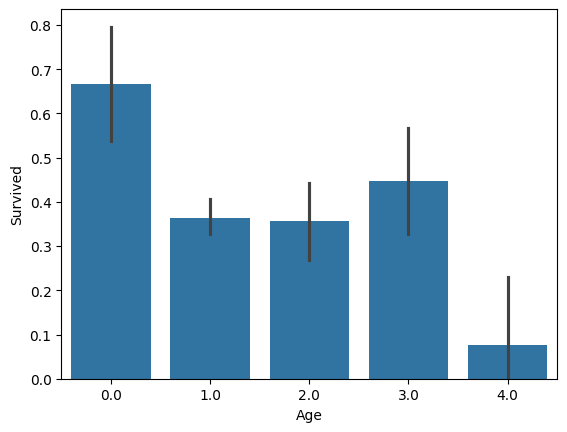

In [33]:
sns.barplot(x="Age", y="Survived", data=train_data)
plt.show()

In [34]:
survived = train_data[train_data['Survived']==1]['Age'].value_counts()
dead = train_data[train_data['Survived']==0]['Age'].value_counts()

print((survived/(survived+dead)).sort_index())

Age
0.0    0.666667
1.0    0.364486
2.0    0.356522
3.0    0.447761
4.0    0.076923
Name: count, dtype: float64


In [35]:
train_data.loc[(train_data["Fare"] <= 25), 'Fare'] = 0
train_data.loc[(train_data["Fare"] > 25) & (train_data['Fare'] <= 200), 'Fare'] = 1
train_data.loc[(train_data["Fare"] > 200) & (train_data['Fare'] <= 290), 'Fare'] = 2
train_data.loc[(train_data["Fare"] > 290), 'Fare'] = 3

test_data.loc[(test_data["Fare"] <= 25), 'Fare'] = 0
test_data.loc[(test_data["Fare"] > 25) & (test_data['Fare'] <= 200), 'Fare'] = 1
test_data.loc[(test_data["Fare"] > 200) & (test_data['Fare'] <= 290), 'Fare'] = 2
test_data.loc[(test_data["Fare"] > 290), 'Fare'] = 3

train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_encoded,Title,Pclass_Embarked,FamilySize
0,1,0,3,0,1.0,1,0,0.0,1,0,3_1,2
1,2,1,1,1,2.0,1,0,1.0,2,1,1_2,2
2,3,1,3,1,1.0,0,0,0.0,1,2,3_1,1
3,4,1,1,1,1.0,1,0,1.0,1,1,1_1,2
4,5,0,3,0,1.0,0,0,0.0,1,0,3_1,1


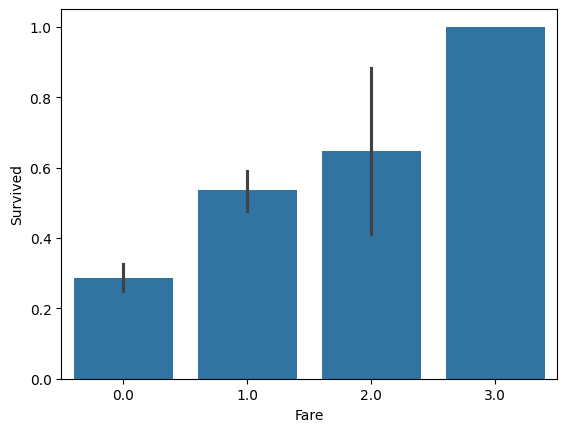

In [36]:
sns.barplot(x="Fare", y="Survived", data=train_data)
plt.show()

In [37]:
title_sex_pclass_fare_mean = train_data.groupby(['Title', 'Sex', 'Pclass'])['Fare'].median()

def fill_age(row):
    if pd.isna(row['Fare']):  #
        return title_sex_pclass_fare_mean.get((row['Title'], row['Sex'], row['Pclass']), row['Fare'])
    else:
        return row['Fare']  # If Age is not NaN, keep the original value

train_data['Fare'] = train_data.apply(fill_age, axis=1)
test_data['Fare'] = train_data.apply(fill_age, axis=1)

test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PassengerId       417 non-null    int64  
 1   Pclass            417 non-null    int64  
 2   Sex               417 non-null    int64  
 3   Age               417 non-null    float64
 4   SibSp             417 non-null    int64  
 5   Parch             417 non-null    int64  
 6   Fare              417 non-null    float64
 7   Embarked_encoded  417 non-null    int64  
 8   Title             417 non-null    object 
 9   Pclass_Embarked   417 non-null    object 
 10  FamilySize        417 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 39.1+ KB


In [38]:
from sklearn.model_selection import train_test_split

predictors = train_data.drop(['Survived', 'PassengerId',"Sex"], axis=1)
target = train_data["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 1)

In [39]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=1)
model.fit(x_train, y_train)

feature_importances = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importances

}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

            Feature  Importance
6             Title    0.463164
7   Pclass_Embarked    0.121119
1               Age    0.092503
8        FamilySize    0.085283
0            Pclass    0.073899
4              Fare    0.055756
2             SibSp    0.043764
3             Parch    0.035013
5  Embarked_encoded    0.029500


In [40]:
from sklearn.metrics import accuracy_score

predictors = train_data.drop(['Survived', 'PassengerId','Fare','Sex' ,'Age','SibSp', 'Parch'], axis=1)
target = train_data["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.4, random_state = 1)

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)

print(acc_randomforest)


77.03


In [41]:
y = train_data["Survived"]
features = ["Pclass","Title",]

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
model = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=1)
model.fit(X, y)

predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('prueba3.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
